# Owlready2 Crash Notebook
Owlready2 is a Python package to construct and manipulate ontology under Python syntax, while Protege is a Java software to construct and manipulate ontologies with various plugins.

This is a notebook to manipulate owl files pre-constructed in Protege, and to utilize some APIs from Owlready2 for information retrieval.

In [1]:
# All necessary imports
import os
import difflib
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import owlready2 as owl

## Part 1: Load a local *.owl file
Owlready2 natively supports RDF/XML format ontology file. 

Refer to "https://pythonhosted.org/Owlready2/onto.html" for more details in ontology manipulation with Owlready2.

In [2]:
# Here, we load a local ontology file, created earlier in Protege.
# A prefix of "file://" is needed.
onto_path = 'file://' + os.path.abspath('object_onto.owl')
onto = owl.get_ontology(onto_path).load()
print('Loaded owl file at:', onto_path)

Loaded owl file at: file:///mnt/c/Users/Zone/Desktop/onto_python/object_onto.owl


## Part 2: Invoke a reasoner
Reasoners are useful when checking the consistency of an ontology or deducing logical facts. Owlready2 includes a modified version of the HermiT reasoner.

Refer to "https://pythonhosted.org/Owlready2/reasoning.html" for more details in reasoning.

In [3]:
# Invoke reasoner
# NOTE: New facts will be appended into the current onto
owl.sync_reasoner()

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/lib/python3.6/dist-packages/Owlready2-0.23-py3.6-linux-x86_64.egg/owlready2/hermit:/usr/local/lib/python3.6/dist-packages/Owlready2-0.23-py3.6-linux-x86_64.egg/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////tmp/tmpaub2k5qk
* Owlready2 * HermiT took 0.6655352115631104 seconds
* Owlready * Reparenting object_onto.hasMaterial: {object_onto.topClassProperty, owl.ObjectProperty, owl.FunctionalProperty} => {object_onto.topClassProperty, owl.FunctionalProperty}
* Owlready * Reparenting object_onto.canWithstandTemperature: {object_onto.topClassProperty, owl.ObjectProperty} => {object_onto.topClassProperty}
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


## Part 3: Some basic APIs exploration
Some APIs that are useful to retrieve information in classes, object properties, etc.

Reference: https://pythonhosted.org/Owlready/class.html

In [4]:
# Manipulation over Classes
# --------------------
# Retrieve all classes inside onto
classes = list(onto.classes())
print('All classes\n'+'-'*20)
for x in classes: 
    print(x)
print()
    
# Get a random class in collection
# Access dict to retrieve more info
cls = classes[-1]
print(cls)
print(cls.__dict__)
print()

# Some useful APIs here
print('name(string):', cls.name)
print('module_type:', cls.__module__)
print('equivalent_to:', cls.equivalent_to)
print('is_a:', cls.is_a)

All classes
--------------------
object_onto.Operator
object_onto.Container
object_onto.MaterialPartition
object_onto.TemperatureValuePartition
object_onto.Bottle
object_onto.Cold
object_onto.DomainThing
object_onto.Partition
object_onto.Glass
object_onto.Hot
object_onto.Mild
object_onto.Plastic
object_onto.GlassBottle
object_onto.Human
object_onto.PlasticBottle

object_onto.PlasticBottle
{'namespace': get_ontology("http://www.semanticweb.org/zone/ontologies/2019/11/object_onto#"), 'storid': 324, '_name': 'PlasticBottle', 'is_a': [object_onto.Bottle, object_onto.isGraspableBy.some(object_onto.Human)], '_equivalent_to': None, '__module__': 'owlready2.entity', '__doc__': None}

name(string): PlasticBottle
module_type: owlready2.entity
equivalent_to: [object_onto.Bottle & object_onto.hasMaterial.some(object_onto.Plastic)]
is_a: [object_onto.Bottle, object_onto.isGraspableBy.some(object_onto.Human)]


In [5]:
# Retrieve all object properties
properties = list(onto.object_properties())
print('\nAll object properties\n'+'-'*20)
for x in properties: 
    print(x)
print()
    
rel = properties[-1]
print(rel)
print(rel.__dict__)
print()

# Some useful APIs here
print('name(string):', rel.name)
print('module_type:', rel.__module__)
print('is_a:', rel.is_a)
print()

"""
The .class_property_type attribute of Properties allows to indicate how to handle class properties:
    “some”: handle class properties as existential restrictions (i.e. SOME restrictions and VALUES restrictions).
    “only”: handle class properties as universal restrictions (i.e. ONLY restrictions).
    “relation”: handle class properties as relations (i.e. simple RDF triple, as in Linked Data).
"""
print('class_property_some:', rel._class_property_some)
print('class_property_only:', rel._class_property_only)
print('class_property_relation:', rel._class_property_relation)


All object properties
--------------------
object_onto.canGrasp
object_onto.topActionRelation
object_onto.isGraspableBy
object_onto.canWithstandTemperature
object_onto.topClassProperty
object_onto.hasMaterial

object_onto.hasMaterial
{'namespace': get_ontology("http://www.semanticweb.org/zone/ontologies/2019/11/object_onto#"), 'is_a': [owl.FunctionalProperty, object_onto.topClassProperty], 'storid': 312, '_name': 'hasMaterial', '_equivalent_to': [], '__module__': 'owlready2.entity', '__doc__': None, '_domain': None, '_range': None, '_property_chain': None, '_inverse_property': None, '_python_name': 'hasMaterial', '_class_property_type': [], '_class_property_some': True, '_class_property_only': False, '_class_property_relation': False, '_inverse_storid': 0}

name(string): hasMaterial
module_type: owlready2.entity
is_a: [owl.FunctionalProperty, object_onto.topClassProperty]

class_property_some: True
class_property_only: False
class_property_relation: False


In [6]:
# Retrieve all disjoint sets
disjoints = list(onto.disjoints())
print('\nAll disjoints\n'+'-'*20)
for x in disjoints: 
    # NOTE: Retreive all disjoint individual entity objects, stored in the dict
    print(x)
    print(x.__dict__)
    print()


All disjoints
--------------------
AllDisjoint([object_onto.Cold, object_onto.Hot, object_onto.Mild])
{'ontology': get_ontology("http://www.semanticweb.org/zone/ontologies/2019/11/object_onto#"), 'storid': -26, '_list_bnode': -27, 'entities': [object_onto.Cold, object_onto.Hot, object_onto.Mild]}

AllDisjoint([object_onto.Container, object_onto.Operator])
{'ontology': get_ontology("http://www.semanticweb.org/zone/ontologies/2019/11/object_onto#"), 'storid': (307, 88, 306), 'entities': [object_onto.Container, object_onto.Operator]}

AllDisjoint([object_onto.DomainThing, object_onto.Partition])
{'ontology': get_ontology("http://www.semanticweb.org/zone/ontologies/2019/11/object_onto#"), 'storid': (316, 88, 317), 'entities': [object_onto.DomainThing, object_onto.Partition]}

AllDisjoint([object_onto.Glass, object_onto.Plastic])
{'ontology': get_ontology("http://www.semanticweb.org/zone/ontologies/2019/11/object_onto#"), 'storid': (318, 88, 321), 'entities': [object_onto.Glass, object_ont

## Part 4: Higher-level API exploration
Some helper functions to retrieve useful info given an entity to search for. This is a mimic of ontograf plugin feature from Protege.

In [7]:
type2str_restriction = owl.class_construct._restriction_type_2_label

def _process_entity(entity, job_name):
    """Helper: Append entity for the specified job.
    """
    return entity, job_name

def _process_restriction(restriction):
    """Helper: Append restriction.
    """
    assert restriction.__module__ == 'owlready2.class_construct'
    
    # Grab object_property --type--> value
    object_property, value = restriction.property, restriction.value
    restriction_type = type2str_restriction[restriction.type]
    
    # Things needed
    rel = '{},{}'.format(object_property.name, restriction_type)
    return value, rel

def _process_subclasses(entity, kg):
    """Helper: Append subclasses.
    """
    # Safely grab all subclasses
    try:
        subclses = list(entity.subclasses())
    except:
        subclses = []

    for subcls in subclses:
        if (entity, subcls, 'has_subclass') not in kg:
            kg.append((entity, subcls, 'has_subclass'))
        if (subcls, entity, 'subclass_of') not in kg:
            kg.append((subcls, entity, 'subclass_of'))

    return kg

def _process_instances(entity, kg):
    """Helper: Append individuals.
    """
    # Safely grab all individuals
    try:
        instances = entity.instances()
    except:
        instances = []

    for instance in instances:
        if instance.is_a[0] == entity:
            if (entity, instance, 'has_individual') not in kg:
                kg.append((entity, instance, 'has_individual'))

    return kg

def generate_knowledge_graph(entity):
    """Helper function to grab entity-relation from onto and 
    return as knowledge graph.
    """
    kg = []

    # Part 1: Append subclasses
    kg = _process_subclasses(entity, kg)

    # Part 2: Collect equivalent_to
    equivalent_to_list = entity.INDIRECT_equivalent_to  # NOTE: Weird bug here, have to use INDIRECT
    for et in equivalent_to_list:
        # equivalent_to AND objects:
        if et.__module__ == 'owlready2.class_construct':
            for x in et.__dict__['Classes']:
                # For class restriction, retrieve relevant infos inside
                if x.__module__ == 'owlready2.class_construct':
                    end_node, rel = _process_restriction(x)
                
                else:
                    end_node, rel = None, ''

                if ((entity, end_node, rel) not in kg) and \
                   (end_node is not None and len(rel) != 0):
                    kg.append((entity, end_node, rel))
                    
    # Part 3: Look into is_a
    is_a_list = entity.is_a
    for x in is_a_list:
        # Entity: is_a indicates subclasses
        if x.__module__ == 'owlready2.entity':
            end_node, rel = _process_entity(x, 'subclass_of')
                
        # Restriction
        elif x.__module__ == 'owlready2.class_construct':
            end_node, rel = _process_restriction(x)

        else:
            end_node, rel = None, ''
                    
        if ((entity, end_node, rel) not in kg) and \
           (end_node is not None and len(rel) != 0):
            kg.append((entity, end_node, rel))
            if rel == 'subclass_of' and (end_node, entity, 'has_subclass') not in kg:
                kg.append((end_node, entity, 'has_subclass'))
        
    # Part 4: Look into instances
    kg = _process_instances(entity, kg)
    
    return kg

def filter_kg(kg, onto):
    """Helper: filter KG from some ill-logical entries.
    """
    filtered_kg = []
    # Grab all individuals
    individuals = list(onto.individuals())

    for graph in kg:
        passed = True
        # Ill-logical individuals
        if graph[0] in individuals:
            passed = False
        if passed:
            filtered_kg.append(graph)
    return filtered_kg

def keyword_search_onto(keyword, onto):
    """Search and index key entity from onto given keyword.
    """
    classes = list(onto.classes())
    classes_str = [x.name for x in classes]
    res = difflib.get_close_matches(keyword, classes_str)[0]
    entity = classes[classes_str.index(res)]
    return entity

def ontograf_simple(orig_entity, onto):
    """Interface func to search and retrieve infor for a given
    entity inside onto.
    """
    # Initial KG search
    kg = generate_knowledge_graph(orig_entity)
    
    # Prep for other key entities given the initial kg
    entities = []
    for graph in kg:
        entities.append(graph[1])

    # 1st-level of filters, append more info from children and parent nodes
    for entity in entities:
        sub_kg = generate_knowledge_graph(entity)
        for graph in sub_kg:
            if graph[1] == orig_entity:
                if (entity, orig_entity, graph[2]) not in kg and entity != orig_entity:
                    kg.append((entity, orig_entity, graph[2]))

    # 2nd-level of filters, filter some ill-logical nodes
    kg = filter_kg(kg, onto)

    return kg

In [8]:
entity = keyword_search_onto('plasticbottle', onto)
print(entity == onto.PlasticBottle, entity)
kg_1 = ontograf_simple(entity, onto)
print('-'*20)
print(kg_1)

print('\n'+'-'*20)
entity = keyword_search_onto('glassbottle', onto)
print(entity == onto.GlassBottle, entity)
kg_2 = ontograf_simple(entity, onto)
print(kg_2)

print('\n'+'-'*20)
entity = keyword_search_onto('bottle', onto)
print(entity == onto.Bottle, entity)
kg_3 = ontograf_simple(entity, onto)
print(kg_3)

print('\n'+'-'*20)
entity = keyword_search_onto('container', onto)
print(entity == onto.Container, entity)
kg_4 = ontograf_simple(entity, onto)
print(kg_4)

print('\n'+'-'*20)
entity = keyword_search_onto('plastic', onto)
print(entity == onto.Plastic, entity)
kg_5 = ontograf_simple(entity, onto)
print(kg_5)

True object_onto.PlasticBottle
--------------------
[(object_onto.PlasticBottle, object_onto.Plastic, 'hasMaterial,some'), (object_onto.PlasticBottle, object_onto.Bottle, 'subclass_of'), (object_onto.Bottle, object_onto.PlasticBottle, 'has_subclass'), (object_onto.PlasticBottle, object_onto.Human, 'isGraspableBy,some'), (object_onto.PlasticBottle, object_onto.PlasticBottle1, 'has_individual'), (object_onto.PlasticBottle, object_onto.PlasticBottle2, 'has_individual'), (object_onto.Human, object_onto.PlasticBottle, 'canGrasp,some')]

--------------------
True object_onto.GlassBottle
[(object_onto.GlassBottle, object_onto.Glass, 'hasMaterial,some'), (object_onto.GlassBottle, object_onto.Bottle, 'subclass_of'), (object_onto.Bottle, object_onto.GlassBottle, 'has_subclass'), (object_onto.GlassBottle, object_onto.Human, 'isGraspableBy,some'), (object_onto.GlassBottle, object_onto.GlassBottle1, 'has_individual'), (object_onto.Human, object_onto.GlassBottle, 'canGrasp,some')]

-----------------

In [9]:
def visualize_graph(kg):
    e = graphviz.Digraph('ER', filename='er.gv')
    e.attr('node', shape='box')
    for graph in kg:
        e.attr('node', shape='box')
        e.node(graph[0].name)
        e.node(graph[1].name)
        e.edge(graph[0].name, graph[1].name, label=graph[2].replace(',', ', '))
    return e

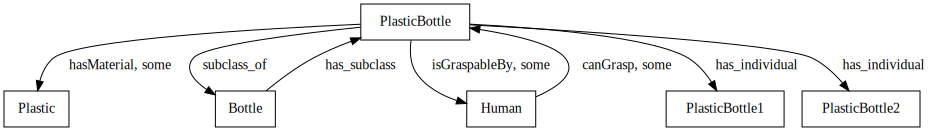

In [10]:
visualize_graph(kg_1)

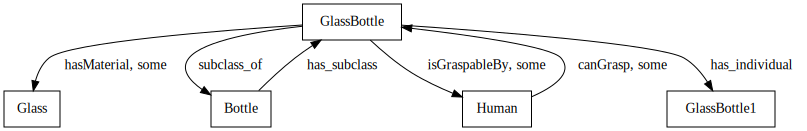

In [11]:
visualize_graph(kg_2)

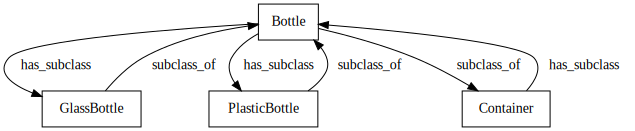

In [12]:
visualize_graph(kg_3)

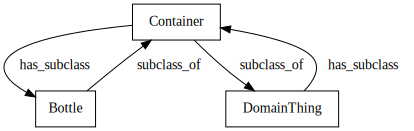

In [13]:
visualize_graph(kg_4)

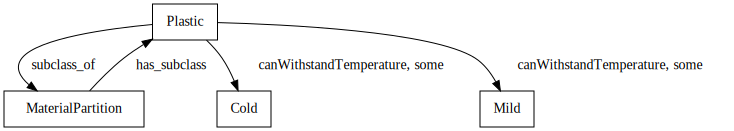

In [14]:
visualize_graph(kg_5)